# Multiple Linear Regression

## LINE Assumptions

    1. Linear Relationship between the features and target
    2. Little or no Multicollinearity between the features
    3. Homoscedasticity Assumption
    4. Normal distribution of error terms

### The Project scope is to check the impact of all the input independent variables on 'MPG' Miles per Gallon which is considered as the output target/dependent variable in this case

- Input Variables are HP, VOL, SP, WT
- Dependent Variable Y is MPG 

In [15]:
# importing libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
cars = pd.read_csv(r'C:\Users\ARSHAD ALI\Downloads\cars.csv')

In [17]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.2 KB


In [19]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


<AxesSubplot:>

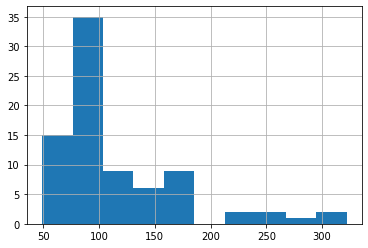

In [20]:
cars['HP'].hist()

<AxesSubplot:>

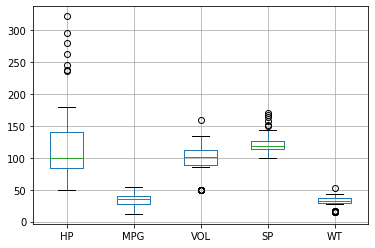

In [21]:
cars.plot.box(grid=True)

### Scatter Plot

c:\users\arshad ali\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


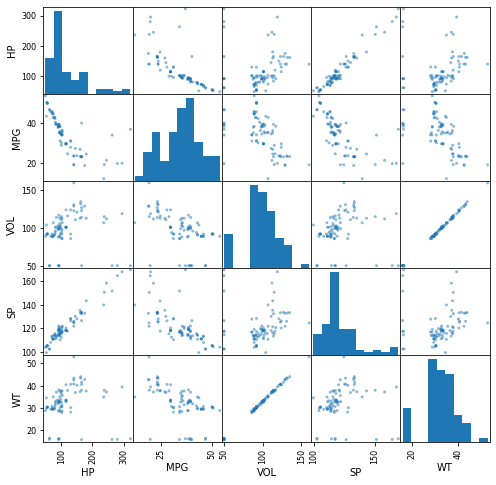

In [22]:
pd.plotting.scatter_matrix(cars, figsize=(8, 8))
plt.show()

### Correlation Matrix

In [23]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [24]:
inp = cars[['HP', 'VOL', 'SP', 'WT']]
inp = sm.add_constant(inp) # adding a constant for B0

out = cars[['MPG']]

### Raw model with all input variables

In [25]:
# model with all input vars.

model1 = LinearRegression()
model1 = sm.OLS(out, inp).fit()
model1_predictions = model1.predict(inp)
# print(model1_predictions.head())
model1_summary = model1.summary()
print(model1_summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           1.54e-23
Time:                        18:02:10   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6773     14.900      2.059      0.0

### Model with VOL variable

In [26]:
# model with only Volume var.

model2 = sm.OLS(out, inp[['const', 'VOL']]).fit()
model2_predictions = model2.predict(inp[['const', 'VOL']])
# print(model2_predictions.head())
model2_summary = model2.summary()
print(model2_summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           3.82e-07
Time:                        18:02:17   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.8171      3.957     14.106      0.0

### Model with only WT variable

In [27]:
# model with only WT var.

model3 = sm.OLS(out, inp[['const', 'WT']]).fit()
model3_predictions = model3.predict(inp[['const', 'WT']])
# print(model3_predictions.head())
model3_summary = model3.summary()
print(model3_summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           4.38e-07
Time:                        18:02:23   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.2296      3.876     14.249      0.0

### Model with all insignificant variables

In [28]:
# model with both VOl & WT vars.

model4 = sm.OLS(out, inp[['const', 'WT', 'VOL']]).fit()
model4_predictions = model4.predict(inp[['const', 'WT', 'VOL']])
# print(model4_predictions.head())
model4_summary = model4.summary()
print(model4_summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           2.43e-06
Time:                        18:02:29   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.8847      4.534     12.546      0.0

### Influence Regression Plot -  to find any influential observations

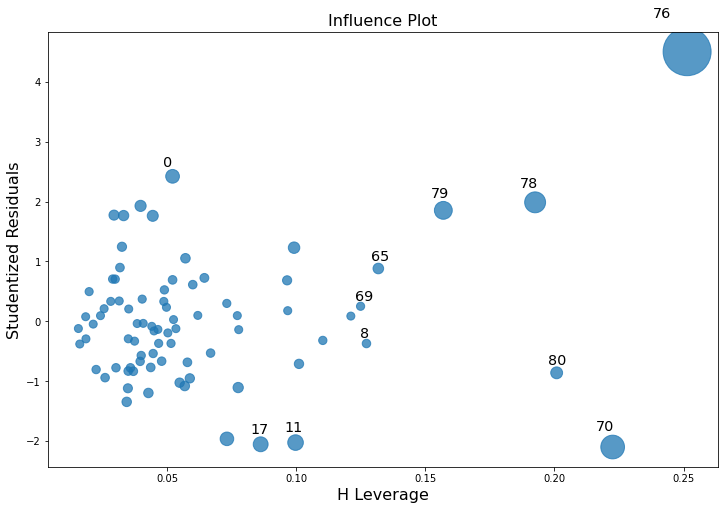

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, alpha=0.05, ax=ax, criterion="cooks")

In [30]:
# Discarding 70 & 76 rows

new_inp = inp.drop(inp.index[[70, 76, 78, 80]])
new_out = out.drop(out.index[[70, 76, 78, 80]])

### Model without influential variables

In [31]:
# model w/o 70 & 76 rows and alll the input vars.

model5 = sm.OLS(new_out, new_inp).fit()
model5_predictions = model5.predict(new_inp)
# print(model5_predictions.head())
model5_summary = model5.summary()
print(model5_summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     87.58
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           6.76e-27
Time:                        18:03:15   Log-Likelihood:                -208.41
No. Observations:                  77   AIC:                             426.8
Df Residuals:                      72   BIC:                             438.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4169     13.745      1.267      0.2

### Variance Inflation Factor

VIF to check collinearity b/n variables

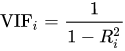

A rule of thumb is that if VIF(i)>10 then multicollinearity is high

In [32]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif["features"] = inp.columns
print(vif)

   VIF Factor features
0  892.909173    const
1   19.926589       HP
2  638.806084      VOL
3   20.007639       SP
4  639.533818       WT


### Partial Regression or Added Value Plot

Partial Regression Plot or Added Variable Plot to check correlation b/n variables and o/p variable

The Added Variable Plot helps answer the question of what is the effect of a particular predictor variable on our dependent variable while holding all other predictor variables constant.


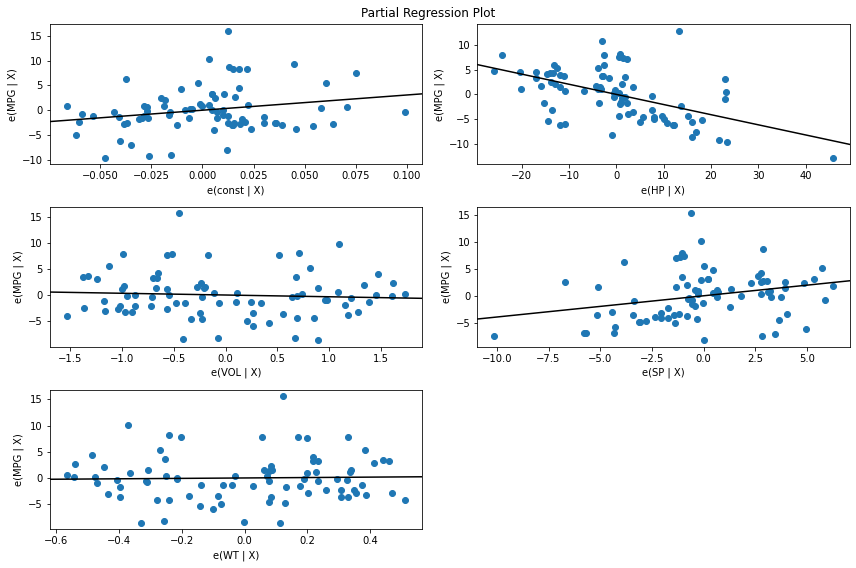

In [31]:
av_fig = plt.figure(figsize=(12,8))
av_fig = sm.graphics.plot_partregress_grid(model1, fig=av_fig)

### Final Model without WT variable

In [37]:
model6 = sm.OLS(new_out, new_inp[['const', 'HP', 'SP','VOL']]).fit()
model6_predictions = model6.predict(new_inp[['const', 'HP', 'SP','VOL']])
# print(model6_predictions.head())
model6_summary = model6.summary()
print(model6_summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     118.2
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           5.95e-28
Time:                        18:07:24   Log-Likelihood:                -208.46
No. Observations:                  77   AIC:                             424.9
Df Residuals:                      73   BIC:                             434.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7125     13.453      1.242      0.2

## Diagnostic Plots for Residuals

###  1. Standardized Residuals vs. Fitted Values

    This plot shows if residuals have non-linear patterns. 

    There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show     up in this plot if the model doesn’t capture the non-linear relationship. 

    If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you       don’t have non-linear relationships.

In [38]:
residuals = model6.resid
fitted = model6.fittedvalues

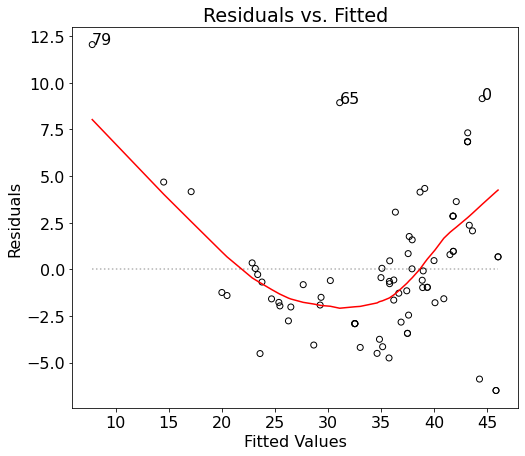

In [39]:
# Residuals vs. Fitted Values
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

### 2. Normal Q-Q

    This plot shows if residuals are normally distributed. 

    Do residuals follow a straight line well or do they deviate severely? 

    It’s good if residuals are lined well on the straight dashed line.

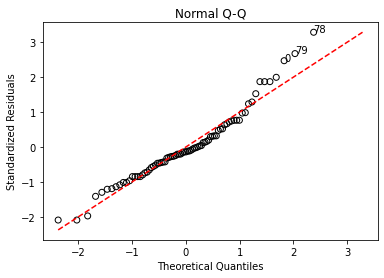

In [34]:
# Normal Q-Q plot of residuals

sorted_student_residuals = pd.Series(model6.get_influence().resid_studentized_internal)
sorted_student_residuals.index = residuals.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

### 3. Scale-Location

    It’s also called Spread-Location plot. This plot shows if residuals are spread equally along the ranges of predictors. 

    This is how you can check the assumption of equal variance (homoscedasticity). 

    It’s good if you see a horizontal line with equally (randomly) spread points.

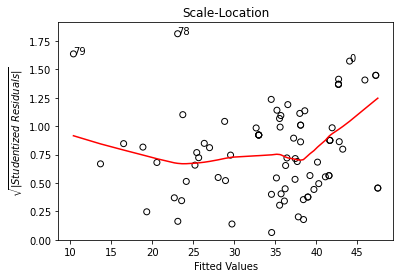

In [39]:
# Square roort(of Studentized Residuals) vs. Fitted Values
lowess = sm.nonparametric.lowess
student_residuals = model6.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = residuals.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

### 4. Residuals vs Leverage

    This plot helps us to find influential cases (i.e., subjects) if any. 

    Not all outliers are influential in linear regression analysis (whatever outliers mean). 

    We watch out for outlying values at the upper right corner or at the lower right corner. 

    Those spots are the places where cases can be influential against a regression line. 

    Look for cases outside of a dashed line, Cook’s distance. 

    When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential     to the regression results.

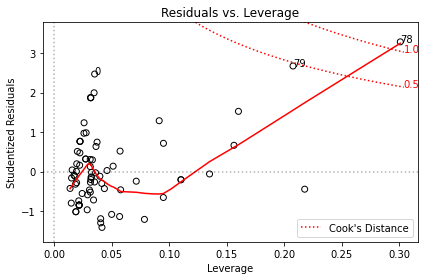

In [40]:
# Studentized Residuals vs. Leverage

student_residuals = pd.Series(model6.get_influence().resid_studentized_internal)
student_residuals.index = residuals.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = model6.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(model6.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

### Note
If you are using a test-train split for your regressions, then you should run the diagnostic plots on the trained regression model before testing the model.